In [2]:
import pandas as pd

csv_file_path="rain_112_station_daily_historical_2022.csv"
df = pd.read_csv(csv_file_path)

In [3]:
df.set_index('date', inplace=True)
df=df.melt(ignore_index=False).reset_index()

In [4]:
df.columns=['date','Station','precipitation']
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')
df.set_index('date', inplace=True)
df=df[(df.index.year>=1991) & (df.index.year<=2020)]

In [5]:
average_results=df.groupby(['Station',df.index.year])['precipitation'].sum().reset_index()
normal=average_results.groupby('Station')['precipitation'].mean().round(1).reset_index()
print(normal)

                   Station  precipitation
0                  Baglung         1774.4
1                Bahrabise         2625.6
2    Baitadi..Gothalapani.         1269.0
3         Bajura..Martadi.         1874.8
4                 Bandipur         1588.7
..                     ...            ...
107              Taulihawa         1306.6
108              Terhathum          897.8
109             Thakmarpha          396.5
110                Tikapur         1626.9
111         Udayapur.Gadhi         1574.6

[112 rows x 2 columns]


In [6]:
normal.to_csv('annual_normal_precipitation.csv')

In [7]:
station_info=pd.read_csv('112_station_info.csv')

In [8]:
normal_df=normal.merge(station_info, left_index=True, right_index=True, how='outer')
print(normal_df.head())

                 Station  precipitation  index_no                station  \
0                Baglung         1774.4       605                Baglung   
1              Bahrabise         2625.6      1027              Bahrabise   
2  Baitadi..Gothalapani.         1269.0       102  Baitadi..Gothalapani.   
3       Bajura..Martadi.         1874.8       204       Bajura..Martadi.   
4               Bandipur         1588.7       808               Bandipur   

        lat    lon  elevation       district  province           station_name  
0  28.26364  83.60        964        Baglung         4                Baglung  
1  27.78868  85.90        884  Sindhupalchok         3              Bahrabise  
2  29.55744  80.41       1352        Baitadi         7  Baitadi (Gothalapani)  
3  29.45698  81.48       1598         Bajura         7       Bajura (Martadi)  
4  27.94183  84.41        991        Tanahun         4               Bandipur  


In [9]:
normal_df.to_csv('annual_normal_precipitation_with_station_info.csv')

In [10]:
import geopandas as gpd 
from shapely.geometry import Point 

shp_file_path = "shpfiles/"
nepal_map_boundary = gpd.read_file(shp_file_path)
print(nepal_map_boundary.total_bounds)
points = [Point(x,y) for x,y in zip(normal_df['lon'],normal_df['lat'])]
print(nepal_map_boundary.crs)



[80.06014783 26.34742364 88.20429852 30.47311098]
GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


              station_name                   geometry
0                  Baglung  POINT (83.60000 28.26364)
1                Bahrabise  POINT (85.90000 27.78868)
2    Baitadi (Gothalapani)  POINT (80.41000 29.55744)
3         Bajura (Martadi)  POINT (81.48000 29.45698)
4                 Bandipur  POINT (84.41000 27.94183)
..                     ...                        ...
107              Taulihawa  POINT (83.07000 27.57108)
108              Terhathum  POINT (87.54000 27.12304)
109             Thakmarpha  POINT (83.68000 28.73887)
110                Tikapur  POINT (81.12000 28.53650)
111         Udayapur Gadhi  POINT (86.54000 26.91295)

[112 rows x 2 columns]


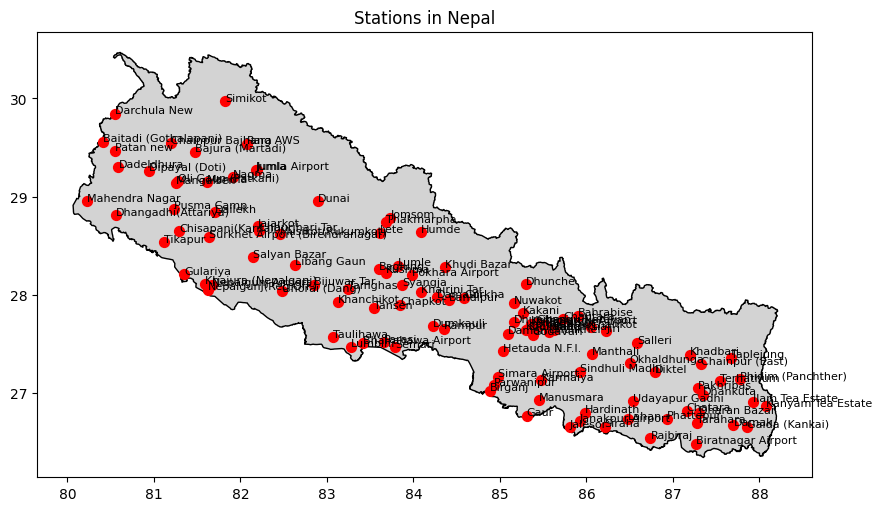

In [11]:
import matplotlib.pyplot as plt 
gdf = gpd.GeoDataFrame(normal_df['station_name'],geometry=points,crs=nepal_map_boundary.crs)
print(gdf)
ax = nepal_map_boundary.plot(figsize=(10, 10), color='lightgray', edgecolor='black')

# Plot station points on top of the map
gdf.plot(ax=ax, color='red', marker='o', markersize=50)

# Add labels for each station
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['station_name']):
    ax.text(x, y, label, fontsize=8)

plt.title('Stations in Nepal')
plt.show()


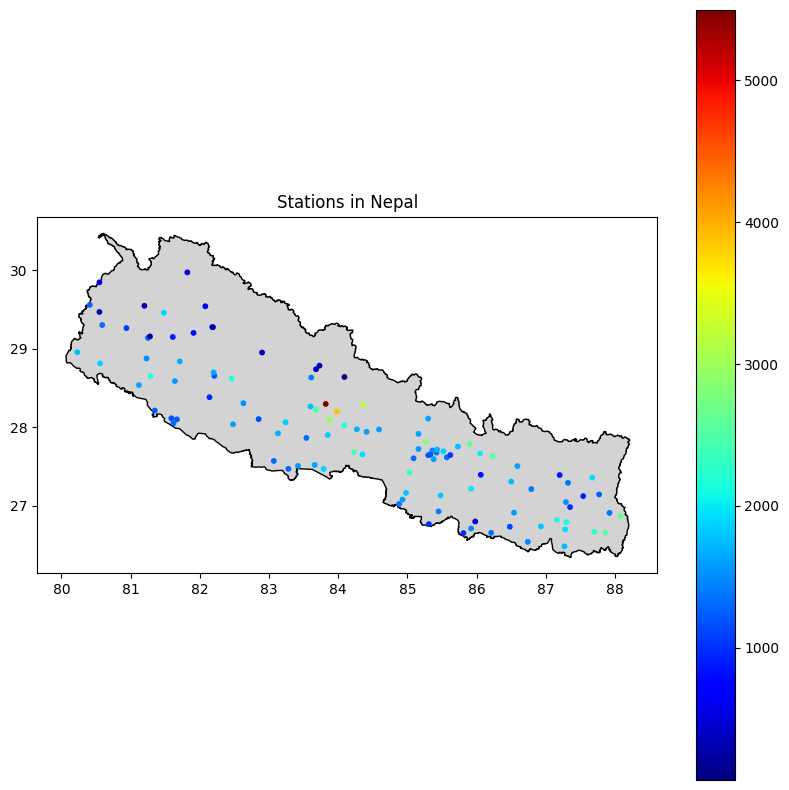

In [15]:
import matplotlib.pyplot as plt 
from matplotlib.colors import Normalize
gdf = gpd.GeoDataFrame(normal_df['station_name'],geometry=points,crs=nepal_map_boundary.crs)
gdf['value'] = normal_df['precipitation']
ax = nepal_map_boundary.plot(figsize=(10, 10), color='lightgray', edgecolor='black')

cmap = 'jet'  # You can change this to 'jet' or other colormaps
norm = Normalize(vmin=gdf['value'].min(), vmax=gdf['value'].max())
print(norm)
gdf.plot(ax=ax, column='value', cmap=cmap, marker='o', markersize=10, legend=True, norm=norm)

# Add labels for each station


plt.title('Stations in Nepal')
plt.savefig('nepal_station.png')
plt.show()